# Figures

Here we provide code and raw data to reproduce the figures of the manuscript. The data presented in Figure 1B is presented again in Figure 3, and is given there.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
from itertools import cycle

plt.rcParams['font.size'] = 12.5
plt.rcParams['figure.dpi'] = 100
plt.rcParams['legend.fontsize'] = 11
plt.rc("savefig", dpi=300)
plt.rcParams['axes.titley'] = 1.0

darker_green = '#da722f'
darker_orange = '#50b28f'

import warnings
warnings.filterwarnings('ignore')

/home/ofirblumer/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Figure 2

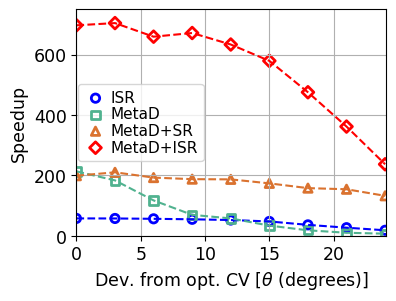

In [2]:
# Load Data
data = pd.read_csv("sourceData/FE_MetaD.csv")

# Create scatter plot using seaborn
plt.figure(figsize=(4.,3))
sns.scatterplot(x=data['theta'], y=data['ISR'], label='ISR', color='blue', facecolors='none', edgecolor='b', linewidth=2)
sns.scatterplot(x=data['theta'], y=data['MetaD'], label='MetaD', color=darker_orange, marker='s', facecolors='none', edgecolor=darker_orange, linewidth=2)
sns.scatterplot(x=data['theta'], y=data['MetaD+SR'], label='MetaD+SR', color=darker_green, marker='^', facecolors='none', edgecolor=darker_green, linewidth=2)
sns.scatterplot(x=data['theta'], y=data['MetaD+ISR'], label='MetaD+ISR', color='red', marker='D', facecolors='none', edgecolor='red', linewidth=2)

# Connect points with lines
plt.plot(data['theta'], data['ISR'], linestyle='--', color='blue')
plt.plot(data['theta'], data['MetaD'], linestyle='--', color=darker_orange)
plt.plot(data['theta'], data['MetaD+SR'], linestyle='--', color=darker_green)
plt.plot(data['theta'], data['MetaD+ISR'], linestyle='--', color='red')

# Customize plot
plt.xlim(0, 24.1)
plt.ylim(0, 750)
plt.xlabel(r'Dev. from opt. CV [$\theta$ (degrees)]')
plt.ylabel(r'Speedup')
legend = plt.legend(loc='best', frameon=True, labelspacing=0.1, borderaxespad=0.1, handlelength=1.5, handletextpad=0.2)

plt.grid(True)

## Figure 3

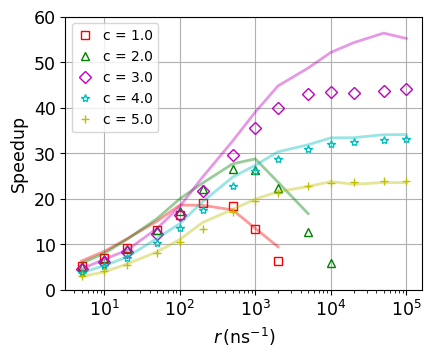

In [3]:
unbiased = 7625.2646965
colors = ["r","g","m","c","y"]
markers = ["s","^","D","*","+"]
data = pd.read_csv("sourceData/FE_MFPT_SR.csv")

fig, ax = plt.subplots(figsize=(4.5,3.75))

for i in range(1,6):
    ax.plot(data.loc[data.c == i].loc[data.source == "prediction"].rate, unbiased / data.loc[data.c == i].loc[data.source == "prediction"].MFPT,
            markers[i - 1], c = colors[i - 1], markerfacecolor = 'none')
    ax.plot(data.loc[data.c == i].loc[data.source == "simulation"].rate, unbiased / data.loc[data.c == i].loc[data.source == "simulation"].MFPT,
            c = colors[i - 1], linewidth = 2, alpha = 0.4)
    
ax.grid(True)
ax.set_ylabel("Speedup")
ax.set_xlabel(r'$r \, ($ns$^{-1})$')
ax.legend(["c = 1.0","__nolegend__","c = 2.0","__nolegend__","c = 3.0","__nolegend__","c = 4.0","__nolegend__","c = 5.0","__nolegend__","Sim."],
          handlelength = 1, fontsize = 10)
ax.set_xscale("log") 
ax.set_yticks([0,10,20,30,40,50,60])
fig.tight_layout()

## Figure 4

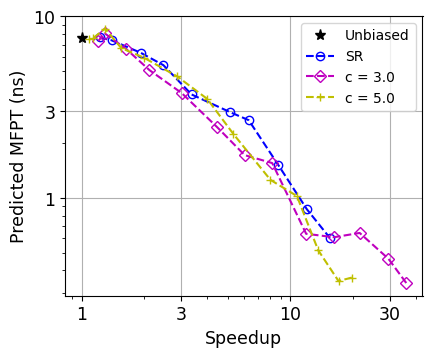

In [4]:
data = pd.read_csv("sourceData/kinetics.csv")

fig, ax = plt.subplots(figsize=(4.5,3.75))

ax.plot(1,unbiased/1000,"*",c="black",ms=8)
ax.plot(data.loc[data.source == "SR"].speedup, data.loc[data.source == "SR"].prediction, "o", linestyle = "dashed", c = "b", markerfacecolor = 'none')
ax.plot(data.loc[data.source == "c=3"].speedup, data.loc[data.source == "c=3"].prediction, "D", linestyle = "dashed", c = "m", markerfacecolor = 'none')
ax.plot(data.loc[data.source == "c=5"].speedup, data.loc[data.source == "c=5"].prediction, "+", linestyle = "dashed", c = "y", markerfacecolor = 'none')

ax.set_ylabel("Predicted MFPT (ns)")
ax.set_xlabel("Speedup")
ax.legend(["Unbiased","SR","c = 3.0","c = 5.0"],fontsize=10)
ax.grid(True)
ax.set_xscale("log")
ax.set_yscale("log")

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks([1,3,10,30])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_yticks([1,3,10])
fig.tight_layout()